In [119]:
import pandas as pd

In [120]:
df = pd.read_csv("sales_with_nans.csv")
df.head(10)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes
5,Treatment,NaN,135.573003,218.559988,58.075342,69.404918,No
6,Control,High Value,191.713918,222.409356,89.967827,85.120975,Yes
7,Control,Low Value,173.752555,213.168232,66.984711,67.881558,NaN
8,NaN,High Value,208.308577,248.178830,95.366670,84.790294,Yes
9,Treatment,High Value,235.071493,352.756872,72.919851,70.753225,No


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         8599 non-null   object 
 1   Customer_Segment              8034 non-null   object 
 2   Sales_Before                  8478 non-null   float64
 3   Sales_After                   9233 non-null   float64
 4   Customer_Satisfaction_Before  8330 non-null   float64
 5   Customer_Satisfaction_After   8360 non-null   float64
 6   Purchase_Made                 9195 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB


In [122]:
total_sales_before = df["Sales_Before"].sum()
avg_sales_before = df["Sales_Before"].mean()
total_sales_after = df["Sales_After"].sum()
avg_sales_after = df["Sales_After"].mean()
avg_satisfaction_before = df["Customer_Satisfaction_Before"].mean()
avg_satisfaction_after = df["Customer_Satisfaction_After"].mean()
min_sales = min(df["Sales_Before"].min(), df["Sales_After"].min())
max_sales = max(df["Sales_Before"].max(), df["Sales_After"].max())

In [123]:
high_value = df["Customer_Segment"][df["Customer_Segment"]=="High Value"]
above_average = df[df["Sales_After"]>avg_sales_after]
mult_con = df[(df["Sales_After"]>250)&(df["Customer_Satisfaction_After"]>50)]
df["Purchase_Made"] = df["Purchase_Made"].fillna("Unknown")
df["Customer_Satisfaction_Before"] = df["Customer_Satisfaction_Before"].fillna(avg_satisfaction_before)
df["Customer_Satisfaction_After"] = df["Customer_Satisfaction_After"].fillna(avg_satisfaction_after)
df = df.dropna(subset=["Group","Customer_Segment","Sales_Before","Sales_After"])
df.head(100)

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,73.872593,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
6,Control,High Value,191.713918,222.409356,89.967827,85.120975,Yes
...,...,...,...,...,...,...,...
193,Control,Low Value,137.619902,162.055497,57.837078,74.158552,No
197,Treatment,Medium Value,287.742065,451.260523,63.782806,68.731214,Yes
198,Control,High Value,271.513585,328.019508,83.631521,96.808959,Yes
201,Treatment,High Value,366.275611,576.680026,100.000000,100.000000,No


In [124]:
df.groupby("Customer_Segment")[["Sales_Before","Sales_After"]].mean()

,Sales_Before,Sales_After
Customer_Segment,,
High Value,224.382577,307.752290
Low Value,183.943987,253.945639
Medium Value,203.940235,280.273354


In [125]:
df["sat_change"] = df["Customer_Satisfaction_After"] - df["Customer_Satisfaction_Before"]
df.groupby("Group")["sat_change"].mean().reset_index().set_index("Group")

,sat_change
Group,
Control,3.723230
Treatment,3.647074


In [126]:
df["sales_change"] = df["Sales_After"] - df["Sales_Before"]
df.groupby("Customer_Segment")["sales_change"].mean().reset_index().set_index("Customer_Segment")

,sales_change
Customer_Segment,
High Value,83.369713
Low Value,70.001652
Medium Value,76.333119


In [127]:
df.groupby("Purchase_Made")["sat_change"].mean().reset_index().pivot(columns="Purchase_Made")

sat_change                    
Purchase_Made         No   Unknown       Yes
0               3.332606       NaN       NaN
1                    NaN  4.095651       NaN
2                    NaN       NaN  3.957807

In [128]:
#which customer segments generated the largest increase in sales? answer: High Value
df.groupby("Customer_Segment")["sales_change"].mean().reset_index().set_index("Customer_Segment")

,sales_change
Customer_Segment,
High Value,83.369713
Low Value,70.001652
Medium Value,76.333119


In [129]:
#did the treatment group improve satisfaction more than the control group? answer: no
df.groupby("Group")["sat_change"].mean().reset_index().set_index("Group")

,sat_change
Group,
Control,3.723230
Treatment,3.647074


correlation between satisfaction before and sales before 0.23578235214818724
correlation between satisfaction after and sales after 0.188953831384309
correlation between satisfaction change and sales change 1.4176835237293035e-05


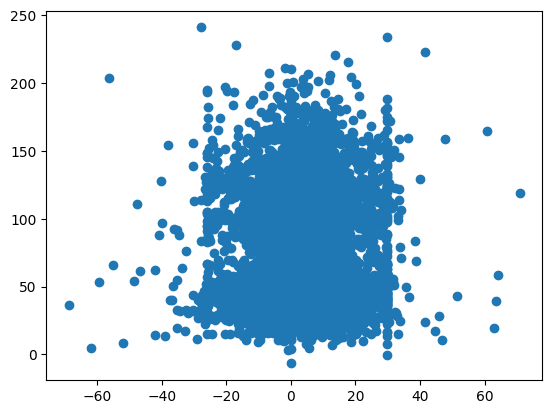

In [130]:
# Are higher sales associated with higher satisfaction? answer: yes, weakly

print("correlation between satisfaction before and sales before", df["Customer_Satisfaction_Before"].corr(df["Sales_Before"]))

print("correlation between satisfaction after and sales after", df["Customer_Satisfaction_After"].corr(df["Sales_After"]))

print("correlation between satisfaction change and sales change",df["sat_change"].corr(df["sales_change"]))

import matplotlib.pyplot as plt
plt.scatter(df["sat_change"],df["sales_change"])